# Análisis para Showz

Uno de los desafíos más importantes que enfrenta Showz es optimizar los gastos de marketing para maximizar el retorno de inversión. Con este análisis buscaremos comprender cómo los clientes interactúan con el servicio, cómo se comportan a lo largo del tiempo y cuándo se logran cubrir los costos de adquisición. A continuación, nos centraremos en los siguientes puntos:

- Comportamiento de los clientes al utilizar el servicio.
- Momento en que los clientes comienzan a realizar compras.
- Valor monetario de cada cliente para la empresa.
- Puntos en los que los ingresos cubren el costo de adquisición de clientes.

## Preparación de datos

In [2]:
# Cargar Librerias 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Cargar base de datos
visits = pd.read_csv('visits_log_us.csv')
orders = pd.read_csv('orders_log_us.csv')
costs = pd.read_csv('costs_us.csv')

# Verificamos el tipo de datos con el que estamos trabajando y su tamaño
# (Podemos visualizar si faltan datos)
print("Información sobre 'visits':")
print(visits.info())
print("\nInformación sobre 'orders':")
print(orders.info())
print("\nInformación sobre 'costs':")
print(costs.info())

# Comprobamos si hay datos vacíos en cada DataFrame
print("\n¿Datos vacíos en 'visits'?")
print(visits.isna().sum())
print("\n¿Datos vacíos en 'orders'?")
print(orders.isna().sum())
print("\n¿Datos vacíos en 'costs'?")
print(costs.isna().sum())

# Revisar si hay duplicados en el DataFrame 'visits'
print("\nDuplicados en 'visits':")
print(visits.duplicated().sum())  # Cuenta el número de filas duplicadas

# Revisar si hay duplicados en el DataFrame 'orders'
print("\nDuplicados en 'orders':")
print(orders.duplicated().sum())

# Revisar si hay duplicados en el DataFrame 'costs'
print("\nDuplicados en 'costs':")
print(costs.duplicated().sum())


Información sobre 'visits':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB
None

Información sobre 'orders':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB
None

Información sobre 'costs':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (tota

In [4]:
#Corregimos el tipo de datos de algunas columnas para poder hacer analisis por fechas
visits['End Ts'] = pd.to_datetime(visits['End Ts'])
visits['Start Ts'] = pd.to_datetime(visits['Start Ts'])
orders['Buy Ts'] = pd.to_datetime(orders['Buy Ts'])
costs['dt'] = pd.to_datetime(costs['dt'])

#Cambiamos el tipo de datos para optimizar memoria 
visits['Source Id'] = visits['Source Id'].astype('int32')
orders['Revenue'] = orders['Revenue'].astype('float32')
visits['Device'] = visits['Device'].astype('category')

# Convertir nombres de columnas a minúsculas y reemplazar espacios con '_'
visits.columns = visits.columns.str.lower().str.replace(" ", "_")
orders.columns = orders.columns.str.lower().str.replace(" ", "_")
costs.columns = costs.columns.str.lower().str.replace(" ", "_")

# Confirmar los cambios
print("\nNombres de columnas en 'visits':", visits.columns)
print("\nNombres de columnas en 'orders':", orders.columns)
print("\nNombres de columnas en 'costs':", costs.columns)


Nombres de columnas en 'visits': Index(['device', 'end_ts', 'source_id', 'start_ts', 'uid'], dtype='object')

Nombres de columnas en 'orders': Index(['buy_ts', 'revenue', 'uid'], dtype='object')

Nombres de columnas en 'costs': Index(['source_id', 'dt', 'costs'], dtype='object')


#### Conclusión de la Preparación de Datos

Hemos identificado y corregido pequeños errores en los tipos de datos, ya que pandas no siempre asigna el tipo adecuado debido a diversos factores. Además, observamos que los nombres de las columnas mezclaban mayúsculas y minúsculas, y contenían espacios en blanco. Por lo tanto, nos dedicamos a uniformar el formato, utilizando solo minúsculas y reemplazando los espacios en blanco con guiones bajos.

Mejoras:

Optimizamos el uso de memoria cambiando el tipo de datos en algunas columnas.

## Paso 2. Haz informes y calcula métricas




### Visitas

- ¿Cuántas personas lo usan cada día, semana y mes?
- ¿Cuántas sesiones hay por día? (Un usuario puede tener más de una sesión).
- ¿Cuál es la duración de cada sesión?
- ¿Con qué frecuencia los usuarios regresan?

Diccionario:

DAU ("Daily Active Users"): el número de usuarios diarios únicos.

WAU ("Weekly Active Users"): el número de usuarios activos semanales.

MAU ("Monthly Active Users"): el número de usuarios activos mensuales.

In [6]:
# ¿Cuántas personas lo usan cada día, semana y mes?
visits['session_year']  = visits['start_ts'].dt.isocalendar().year
visits['session_month'] = visits['start_ts'].dt.month
visits['session_week']  = visits['start_ts'].dt.isocalendar().week
visits['session_date'] = visits['start_ts'].dt.date

dau_total = visits.groupby('session_date').agg({'uid': 'nunique'}).mean().round()
wau_total = visits.groupby(['session_year', 'session_week']).agg({'uid': 'nunique'}).mean().round()
mau_total = (visits.groupby(['session_year', 'session_month']).agg({'uid': 'nunique'}).mean()).round()

print("\nNúmero de usuarios diarios únicos (promedio):", dau_total)
print("\nNúmero de usuarios semanles únicos (promedio):", wau_total)
print("\nNúmero de usuarios mensuales únicos (promedio):", mau_total)



Número de usuarios diarios únicos (promedio): uid    908.0
dtype: float64

Número de usuarios semanles únicos (promedio): uid    5716.0
dtype: float64

Número de usuarios mensuales únicos (promedio): uid    23228.0
dtype: float64


In [ ]:
# ¿Cuántas sesiones hay por día? (Un usuario puede tener más de una sesión)

# Hacemos una agrupacción que nos ayude a contar el numero de sesiones y de usuarios hay por dia:
sessions_per_user = visits.groupby(['session_year', 'session_date']).agg(
    {'uid': ['count', 'nunique']})
sessions_per_user.columns = ['n_sessions', 'n_users']
sessions_per_user['sess_per_user'] = (sessions_per_user['n_sessions'] / sessions_per_user['n_users'])

print("\nNúmero de sesiones por día y número de usuarios:")
display(sessions_per_user[['n_sessions', 'n_users']])



Número de sesiones por día y número de usuarios:


n_sessions  n_users
session_year session_date                     
2017         2017-06-01           664      605
             2017-06-02           658      608
             2017-06-03           477      445
             2017-06-04           510      476
             2017-06-05           893      820
...                               ...      ...
2018         2018-05-27           672      620
             2018-05-28          1156     1039
             2018-05-29          1035      948
             2018-05-30          1410     1289
             2018-05-31          2256     1997

[364 rows x 2 columns]

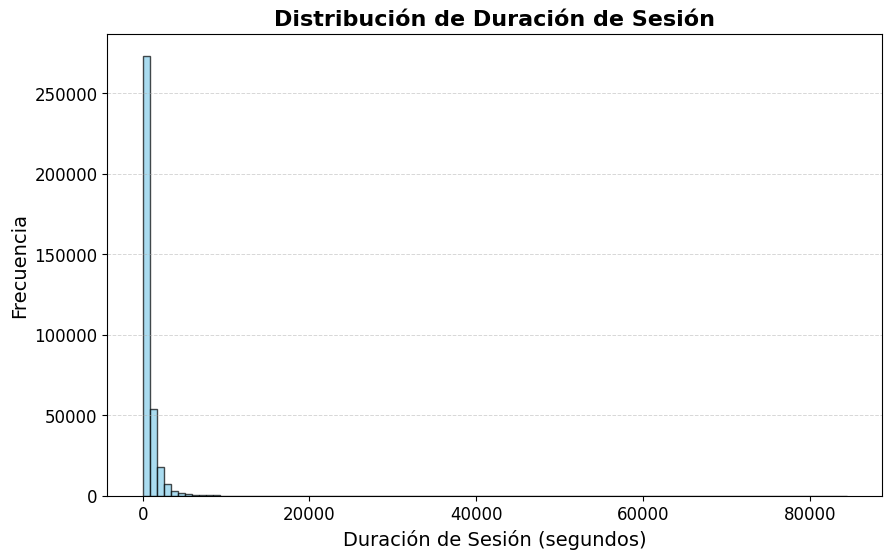

Duracion media de las sesiones: 644.0


In [ ]:

# ¿Cuál es la duración de cada sesión?

# Encontramos la duracion de la sesion de cada usuario restando el tiempo en que inicio al que termino y graficamos.
visits['session_duration'] = (visits['end_ts'] - visits['start_ts']).dt.seconds

# histograma 
plt.figure(figsize=(10, 6))
plt.hist(visits['session_duration'], bins=100, color='skyblue', edgecolor='black', alpha=0.7)

# Personalizar el gráfico
plt.title('Distribución de Duración de Sesión', fontsize=16, fontweight='bold')
plt.xlabel('Duración de Sesión (segundos)', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.grid(axis='y', alpha=0.5, linestyle='--', linewidth=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Mostrar el gráfico
plt.show()

asl = visits['session_duration'].mean().round()
print("Duracion media de las sesiones:",asl)


In [ ]:
# ¿Con qué frecuencia los usuarios regresan?

# Encontrar la primera fecha de actividad de cada usuario
first_activity_date = visits.groupby('uid')['start_ts'].min()
first_activity_date.name = 'first_activity_date'

# Unión de la primera fecha de actividad con los datos de actividad del usuario
visits = visits.join(first_activity_date, on='uid', rsuffix='_duplicate')

# Cálculo del inicio de semana para cada fecha de actividad
visits['activity_week'] = visits['start_ts'] - pd.to_timedelta(visits['start_ts'].dt.dayofweek, unit='d')

# Cálculo del inicio de semana para la primera fecha de actividad de cada usuario
visits['first_activity_week'] = visits['first_activity_date'] - pd.to_timedelta(
    visits['first_activity_date'].dt.dayofweek, unit='d'
)

# Cálculo del ciclo de vida de la cohorte en semanas
visits['cohort_lifetime'] = (visits['activity_week'] - visits['first_activity_week']) / np.timedelta64(1, 'W')
visits['cohort_lifetime'] = visits['cohort_lifetime'].astype(int)

# Creación del DataFrame de cohortes
cohorts = visits.groupby(['first_activity_week', 'cohort_lifetime']).agg({'uid': 'nunique'}).reset_index()

# Cálculo del número inicial de usuarios en cada cohorte
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_activity_week', 'uid']]
initial_users_count = initial_users_count.rename(columns={'uid': 'cohort_users'})

# Fusión del recuento inicial de usuarios con el DataFrame de cohortes
cohorts = cohorts.merge(initial_users_count, on='first_activity_week')

# Cálculo de la tasa de retención
cohorts['retention'] = cohorts['uid'] / cohorts['cohort_users']

# Creación de la tabla dinámica de retención
retention_pivot = cohorts.pivot_table(index='first_activity_week', columns='cohort_lifetime', values='retention', aggfunc='sum')

# Impresión de la tabla dinámica de retención
display(retention_pivot)


cohort_lifetime,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
first_activity_week,,,,,,,,,,,,,,,,,,,,,
2017-05-29 00:01:00,$1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$0.50,NaN
2017-05-29 00:02:00,$1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-29 00:03:00,$1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$1.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-29 00:04:00,$1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-29 00:07:00,$1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-05-28 23:55:00,$1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-28 23:56:00,$1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-28 23:57:00,$1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Conclusión de Visitas

Hemos descubierto que el promedio de visitas dura entre 10 a 11 minutos por sesión, y que nuestros usuarios no tienen más de 2 sesiones por día. También encontramos que nuestra capacidad de retención no es óptima, ya que los usuarios no suelen volver mucho tiempo después de su primera compra.

Recomendaciones:
- Hablar con el equipo de marketing para contactar a esos usuarios mediante sus correos de registro.
- Colaborar con el equipo de costos para ofrecer promociones que aumenten el volumen de ventas.


### Ventas

- ¿Cuándo empieza la gente a comprar?
  - (En el análisis de KPI, generalmente nos interesa saber el tiempo que transcurre entre el registro y la conversión, es decir, cuando el usuario se convierte en cliente. Por ejemplo, si el registro y la primera compra ocurren el mismo día, el usuario podría caer en la categoría Conversion 0d. Si la primera compra ocurre al día siguiente, será Conversion 1d. Puedes usar cualquier enfoque que te permita comparar las conversiones de diferentes cohortes para que puedas determinar qué cohorte o canal de marketing es más efectivo.)
- ¿Cuántos pedidos hacen durante un período de tiempo dado?
- ¿Cuál es el tamaño promedio de compra?
- ¿Cuánto dinero traen? (LTV)

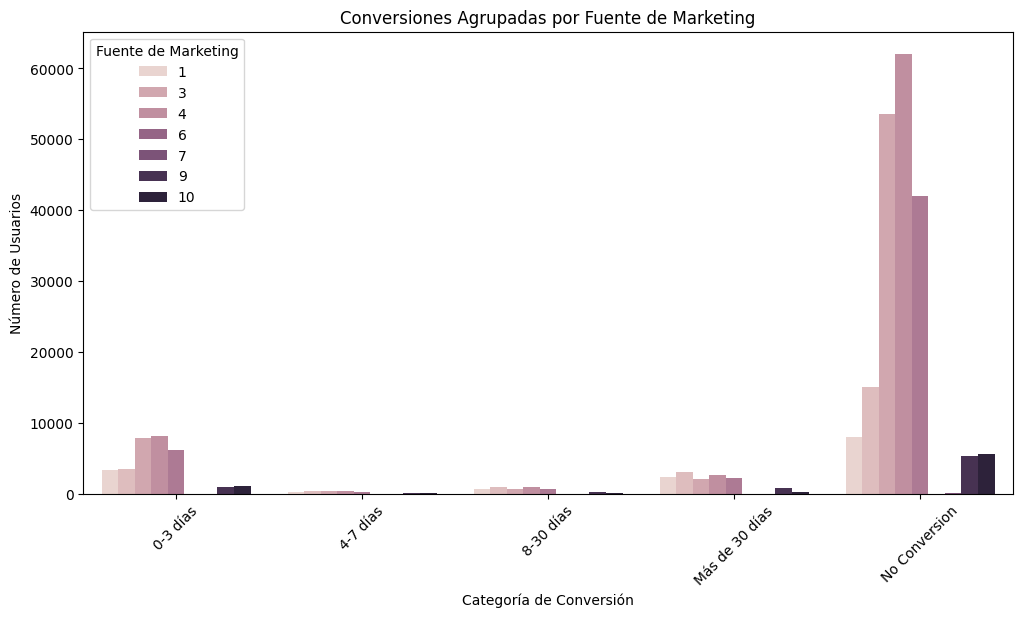

In [10]:
# ¿Cuándo empieza la gente a comprar?

# Unir la información de 'first_activity_date' y 'orders' por 'uid'
user_data = pd.merge(first_activity_date, orders, on='uid', how='left')

# Calcular el tiempo entre el registro y la primera compra
user_data['conversion_time'] = (user_data['buy_ts'] - user_data['first_activity_date']).dt.days

# Clasificar usuarios según el tiempo de conversión
def categorize_conversion_time(x):
    if pd.isnull(x):
        return "No Conversion"
    elif x <= 30:
        return f"Conversion {x}d"
    else:
        return "Conversion >30d"

user_data['conversion_category'] = user_data['conversion_time'].apply(categorize_conversion_time)

# Agrupar las categorías en rangos
def group_conversion_time(x):
    if pd.isnull(x):
        return "No Conversion"
    elif x <= 3:
        return "0-3 días"
    elif x <= 7:
        return "4-7 días"
    elif x <= 30:
        return "8-30 días"
    else:
        return "Más de 30 días"

user_data['conversion_category_grouped'] = user_data['conversion_time'].apply(group_conversion_time)

# Agregar información de la fuente del usuario
visits_source = visits[['uid', 'source_id']].drop_duplicates(subset='uid', keep='first')
user_data = pd.merge(user_data, visits_source, on='uid', how='left')

# Agrupar por fuente y categoría de conversión agrupada
conversion_analysis_grouped = user_data.groupby(['source_id', 'conversion_category_grouped']).size().reset_index(name='count')

# Visualizar el análisis con gráfico
plt.figure(figsize=(12, 6))
sns.barplot(data=conversion_analysis_grouped, x='conversion_category_grouped', y='count', hue='source_id')
plt.title('Conversiones Agrupadas por Fuente de Marketing')
plt.xticks(rotation=45)
plt.xlabel('Categoría de Conversión')
plt.ylabel('Número de Usuarios')
plt.legend(title='Fuente de Marketing')
plt.show()



Número de compradores únicos por mes:
   first_order_month  n_buyers
0            2017-06      2023
1            2017-07      1923
2            2017-08      1370
3            2017-09      2581
4            2017-10      4340
5            2017-11      4081
6            2017-12      4383
7            2018-01      3373
8            2018-02      3651
9            2018-03      3533
10           2018-04      2276
11           2018-05      2988
12           2018-06         1


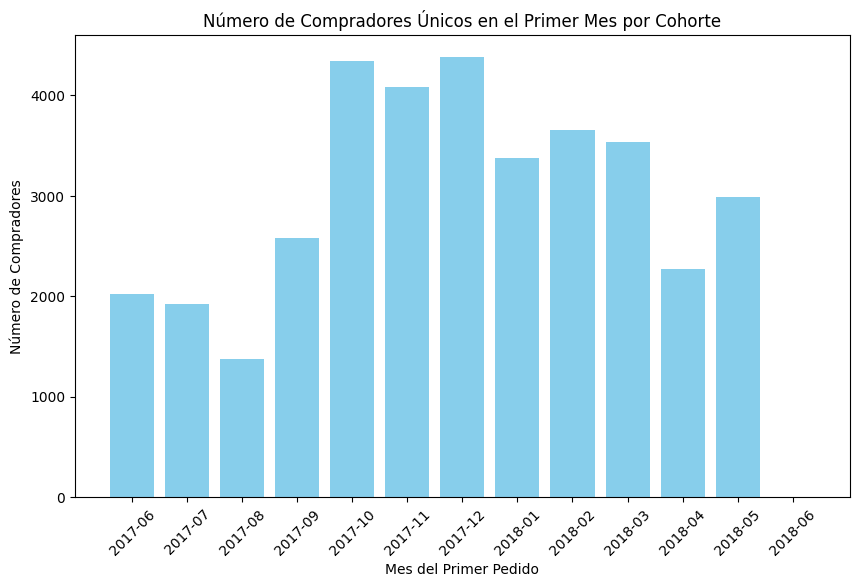

In [11]:
# ¿Cuántos pedidos hacen durante un período de tiempo dado?

# Obtener el mes del primer pedido de cada usuario
orders['buy_month'] = orders['buy_ts'].dt.to_period('M')  # Convertir la fecha a formato de periodo mensual
first_orders = orders.groupby('uid').agg({'buy_month': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_month']

# Contar el número de compradores únicos para cada mes
cohort_sizes = first_orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']

# Mostrar los resultados
print('Número de compradores únicos por mes:')
print(cohort_sizes)

# (Opcional) Visualizar el resultado
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(cohort_sizes['first_order_month'].astype(str), cohort_sizes['n_buyers'], color='skyblue')
plt.title('Número de Compradores Únicos en el Primer Mes por Cohorte')
plt.xlabel('Mes del Primer Pedido')
plt.ylabel('Número de Compradores')
plt.xticks(rotation=45)
plt.show()


In [12]:
#¿Cuál es el tamaño promedio de compra?

# Calcular el tamaño promedio de compra
average_order_size = orders['revenue'].mean()

print(f'Tamaño promedio de compra: {average_order_size:.2f}')


Tamaño promedio de compra: 5.00


In [ ]:
# ¿Cuánto dinero traen?

# Crear columnas para el mes de compra
orders['order_month'] = pd.to_datetime(orders['buy_ts']).dt.to_period('M').dt.to_timestamp()
costs['month'] = pd.to_datetime(costs['dt']).dt.to_period('M').dt.to_timestamp()

# Calcular el primer mes de pedido para cada usuario
first_orders = orders.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_month']

# Tamaño de cohortes
cohort_sizes = first_orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']

# Margen de ganancia
margin_rate = 0.4

# Unir datos y calcular cohortes
orders_ = pd.merge(orders, first_orders, on='uid')
cohorts = (
    orders_.groupby(['first_order_month', 'order_month'])
    .agg({'revenue': 'sum'})
    .reset_index()
)
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')

# Calcular ganancias brutas
report['gp'] = report['revenue'] * margin_rate

# Calcular edad (en meses) manualmente
report['age'] = (
    (report['order_month'].dt.year - report['first_order_month'].dt.year) * 12 +
    (report['order_month'].dt.month - report['first_order_month'].dt.month)
)

# Calcular LTV
report['ltv'] = report['gp'] / report['n_buyers']

# Tabla dinámica con LTV
result = report.pivot_table(
    index='first_order_month', columns='age', values='ltv', aggfunc='mean'
).round()

result = result.fillna('')

# Asegurarse de que 'costs' tenga columnas numéricas para sumar
monthly_costs = costs.groupby('month')['costs'].sum().reset_index()

# Unir costos con el reporte
report_ = pd.merge(
    report, monthly_costs, left_on='first_order_month', right_on='month'
)
report_['cac'] = report_['costs'] / report_['n_buyers']

# Calcular ROMI
report_['romi'] = report_['ltv'] / report_['cac']

# Tabla dinámica con ROMI
result_romi = report_.pivot_table(
    index='first_order_month', columns='age', values='romi', aggfunc='mean'
)

# LTV acumulado en 6 meses
result_cum = report_.pivot_table(
    index='first_order_month', columns='age', values='ltv', aggfunc='mean'
).cumsum(axis=1)

m12_cum_ltv = result_cum.mean(axis=0).get(11, 'No data')  # LTV acumulado durante 12 meses

print('El LTV promedio durante 12 meses desde el primer pedido:', m12_cum_ltv)

El LTV promedio durante 12 meses desde el primer pedido: 4.751693665244705


#### Conclusión de Ventas

1. **Valor de Vida del Cliente (LTV)**: El LTV promedio durante 12 meses desde el primer pedido es de aproximadamente 4.75 unidades monetarias. Esto indica que cada cliente genera un valor significativo para el negocio durante su primer año.

2. **Tamaño Promedio de Compra**: El tamaño promedio de compra es de 5.00 unidades monetarias, mostrando que cada transacción tiene un valor considerable.

3. **Conversión por Fuente de Marketing**: La imagen revela que la mayoría de los usuarios no convierten, lo cual es una oportunidad para mejorar las estrategias de marketing. Las conversiones tienden a ocurrir en los primeros 3 días, subrayando la importancia de acciones de marketing inmediatas y efectivas. Las fuentes de marketing 1, 3 y 4 son las más efectivas en cuanto a conversiones tempranas, pero también presentan altos números de no conversiones, indicando un área para optimización.

4. **Número de Compradores Únicos por Mes (Primera Imagen)**:
   La imagen muestra un gráfico de barras con el número de compradores únicos en el primer mes por cohorte. Se observa una variación significativa mes a mes con un pico notable en noviembre de 2017 (más de 4500 compradores), seguido de una disminución gradual hasta mayo de 2018, donde hay un leve aumento nuevamente. Este análisis es crucial para entender el comportamiento de los compradores y ajustar las estrategias de marketing.

**Recomendaciones Estratégicas**:
- **Optimización de Marketing Inmediato**: Enfocar esfuerzos en las primeras 72 horas desde el contacto inicial para maximizar las conversiones.
- **Analizar Fuentes de Marketing**: Profundizar en el análisis de por qué las fuentes de marketing 1, 3 y 4 son efectivas y encontrar maneras de reducir las no conversiones.
- **Estacionalidad y Tendencias**: Aprovechar los picos estacionales identificados (noviembre de 2017) y ajustar las campañas de marketing para capitalizar sobre estos periodos.

Estas conclusiones te pueden ayudar a tomar decisiones informadas y a diseñar estrategias más efectivas para incrementar tus ventas y el valor a largo plazo de tus clientes.


### Marketing

- ¿Cuánto dinero se gastó? (Total/por fuente de adquisición/a lo largo del tiempo)
- ¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes?
- ¿Cuán rentables eran las inversiones? (ROMI)

Total gastado: 329131.62


C:\Users\jesus\AppData\Local\Temp\ipykernel_29104\1132256938.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='source_id', y='costs', data=gasto_por_fuente, palette='Blues_d')


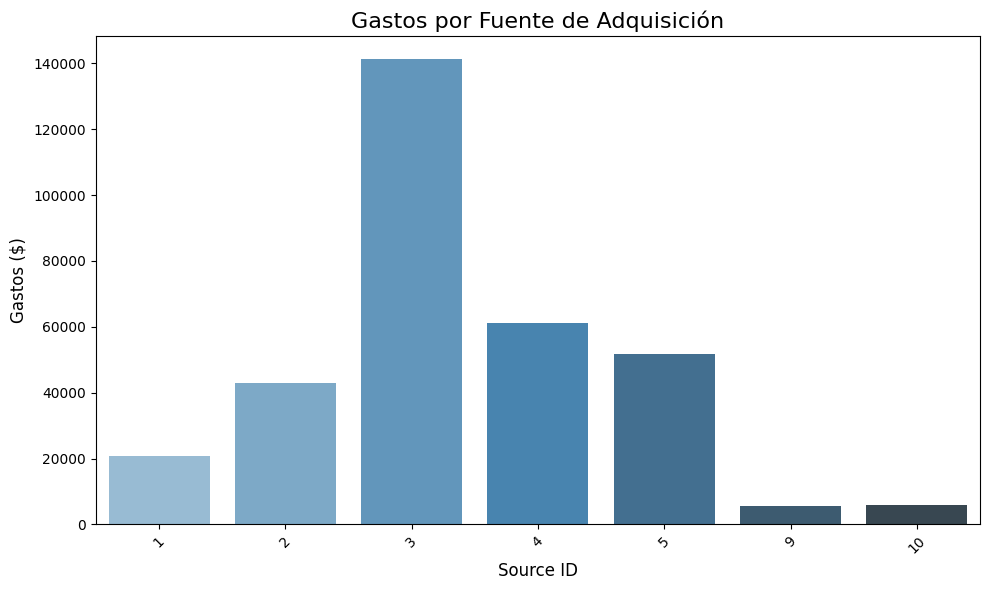

In [17]:
# ¿Cuánto dinero se gastó? (Total/por fuente de adquisición/a lo largo del tiempo)
total_gasto = costs['costs'].sum()
print(f"Total gastado: {total_gasto}")

# Gastos por fuente
gasto_por_fuente = costs.groupby('source_id')['costs'].sum().reset_index()

# Visualización de los gastos por fuente
plt.figure(figsize=(10, 6))
sns.barplot(x='source_id', y='costs', data=gasto_por_fuente, palette='Blues_d')
plt.title('Gastos por Fuente de Adquisición', fontsize=16)
plt.xlabel('Source ID', fontsize=12)
plt.ylabel('Gastos ($)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

   source_id   CAC
0          1 $1.10
1          2 $1.63
2          3 $1.89
3          4 $0.73
4          5 $0.91
5          9 $0.60
6         10 $0.72


C:\Users\jesus\AppData\Local\Temp\ipykernel_29104\2927417101.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='source_id', y='CAC', data=cac, palette='Greens_d')


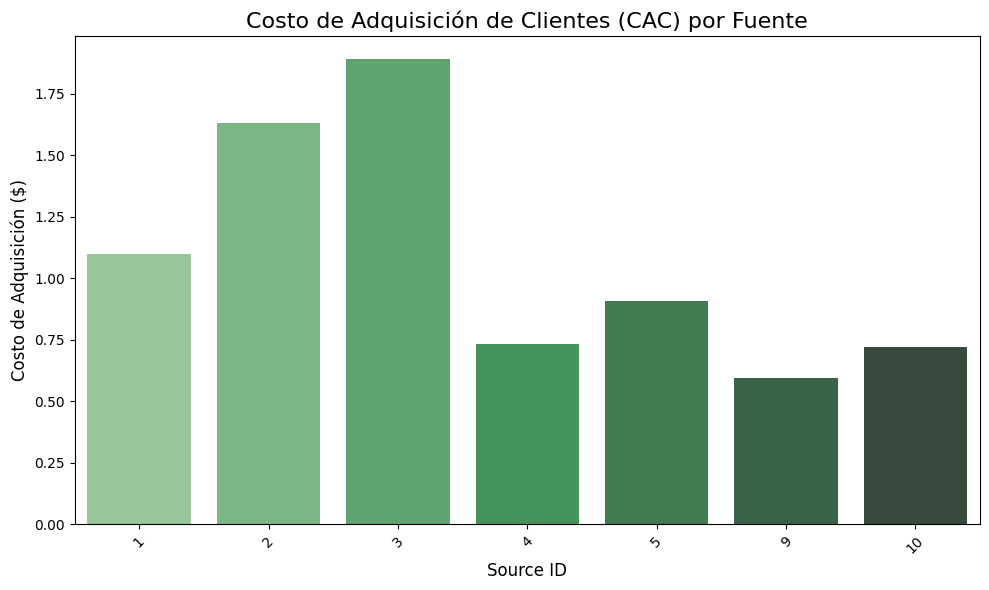

In [18]:
# ¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes? (CAC)

# Contamos el número de clientes únicos por fuente
clientes_por_fuente = visits.groupby('source_id')['uid'].nunique().reset_index()
clientes_por_fuente = clientes_por_fuente.rename(columns={'uid': 'num_clientes'})

# Obtenemos el gasto total por fuente
gasto_por_fuente = costs.groupby('source_id')['costs'].sum().reset_index()

# Unimos los datos de clientes y gastos
cac = pd.merge(clientes_por_fuente, gasto_por_fuente, on='source_id')
""
# Calculamos el CAC
cac['CAC'] = cac['costs'] / cac['num_clientes']
print(cac[['source_id', 'CAC']])

# Visualización de CAC por fuente
plt.figure(figsize=(10, 6))
sns.barplot(x='source_id', y='CAC', data=cac, palette='Greens_d')
plt.title('Costo de Adquisición de Clientes (CAC) por Fuente', fontsize=16)
plt.xlabel('Source ID', fontsize=12)
plt.ylabel('Costo de Adquisición ($)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

   source_id       revenue       costs    ROMI
0          1 $2,298,200.25  $20,833.27 $110.31
1          2 $2,638,189.25  $42,806.04  $61.63
2          3   $296,687.97 $141,321.63   $2.10
3          4   $496,690.16  $61,073.60   $8.13
4          5 $1,181,477.12  $51,757.10  $22.83
5          9    $36,342.25   $5,517.49   $6.59
6         10    $14,619.23   $5,822.49   $2.51


C:\Users\jesus\AppData\Local\Temp\ipykernel_29104\2042426081.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='source_id', y='ROMI', data=romi, palette='coolwarm')


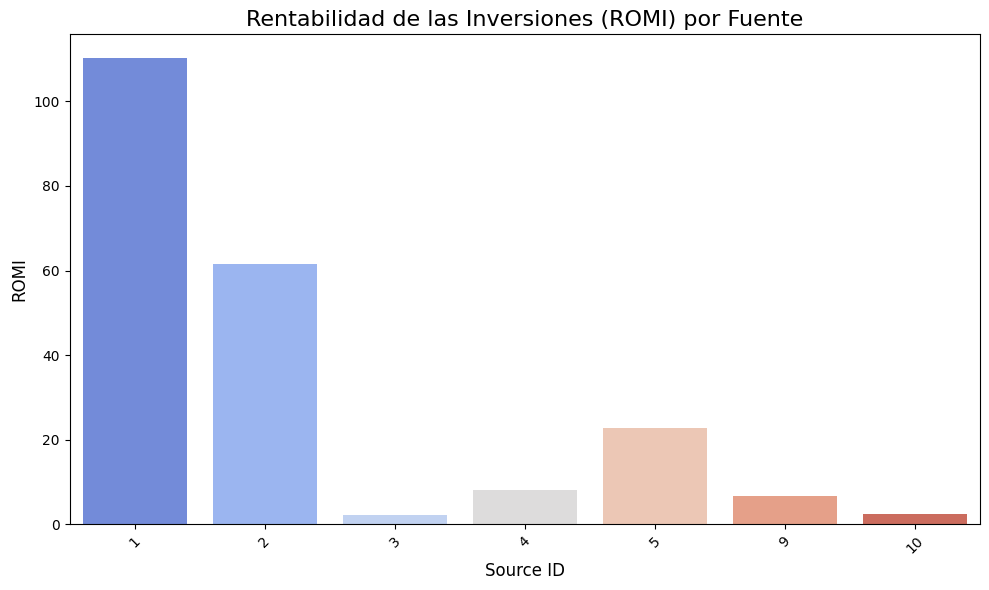

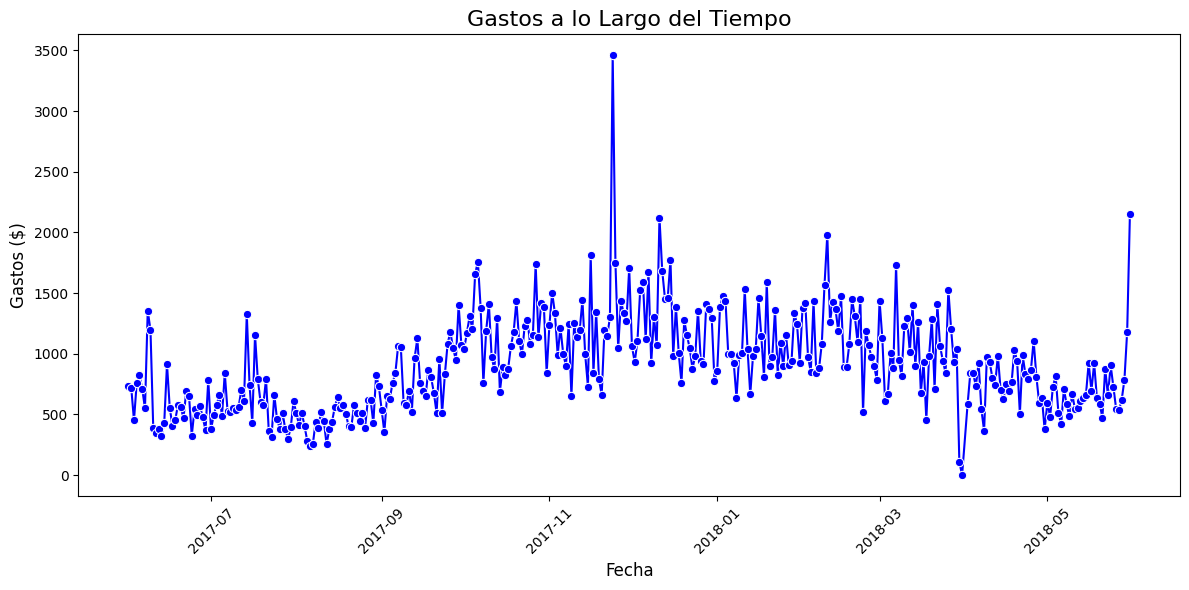

In [20]:
# ¿Cuán rentables eran las inversiones? (ROMI)

# Unimos las tablas 'visits' y 'orders' para obtener los ingresos por usuario
visits_orders = pd.merge(visits, orders, on='uid', how='left')

# Sumamos los ingresos por fuente (ahora usando 'revenue' en minúsculas)
ingresos_por_fuente = visits_orders.groupby('source_id')['revenue'].sum().reset_index()

# Obtenemos los costos por fuente
gasto_por_fuente = costs.groupby('source_id')['costs'].sum().reset_index()

# Unimos ingresos y gastos
romi = pd.merge(ingresos_por_fuente, gasto_por_fuente, on='source_id')

# Calculamos el ROMI
romi['ROMI'] = romi['revenue'] / romi['costs']
print(romi)

# Visualización de ROMI por fuente
plt.figure(figsize=(10, 6))
sns.barplot(x='source_id', y='ROMI', data=romi, palette='coolwarm')
plt.title('Rentabilidad de las Inversiones (ROMI) por Fuente', fontsize=16)
plt.xlabel('Source ID', fontsize=12)
plt.ylabel('ROMI', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. **Gastos a lo Largo del Tiempo**:
# Agrupamos los gastos por fecha
gasto_por_fecha = costs.groupby('dt')['costs'].sum().reset_index()

# Visualización de los gastos a lo largo del tiempo
plt.figure(figsize=(12, 6))
sns.lineplot(x='dt', y='costs', data=gasto_por_fecha, marker='o', color='b')
plt.title('Gastos a lo Largo del Tiempo', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Gastos ($)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()





#### Conclusión Marketing

1. **Gastos a lo Largo del Tiempo**:
   El gráfico muestra las fluctuaciones diarias en los gastos desde mediados de 2017 hasta mediados de 2018. Se observa un pico significativo en noviembre de 2017, donde los gastos superaron los $3000. Este tipo de visualización es relevante para analizar los patrones de gasto y identificar períodos de altos y bajos gastos.

2. **Rentabilidad de las Inversiones (ROMI) por Fuente**:
   El gráfico de barras muestra los valores de ROMI para diferentes fuentes identificadas por números 1, 2, 3, 4, 5, 9 y 10. La Fuente 1 tiene el valor de ROMI más alto, seguida por la Fuente 2, y así sucesivamente. Esto indica que la Fuente 1 es la más rentable en términos de retorno de inversión.

3. **Costo de Adquisición de Clientes (CAC) por Fuente**:
   La imagen del CAC muestra los costos en dólares asociados a diferentes fuentes de adquisición, con los siguientes puntos destacados:
   - **Fuente 1**: Aproximadamente $1.00
   - **Fuente 2**: Aproximadamente $1.50
   - **Fuente 3**: Aproximadamente $1.75
   - **Fuente 4**: Aproximadamente $0.75
   - **Fuente 5**: Aproximadamente $1.00
   - **Fuente 9**: Aproximadamente $0.50
   - **Fuente 10**: Aproximadamente $0.75

4. **Gastos por Fuente de Adquisición**:
   La imagen muestra un gráfico de barras que representa los gastos en dólares ($) asociados a diferentes fuentes de adquisición identificadas por "Source ID" del 1 al 10. Aquí están los gastos aproximados por fuente:
   - **Fuente 1**: $20,000
   - **Fuente 2**: $45,000
   - **Fuente 3**: $145,000
   - **Fuente 4**: $70,000
   - **Fuente 5**: $60,000
   - **Fuente 9**: $10,000
   - **Fuente 10**: $15,000

**Recomendaciones Estratégicas Personalizadas**:
- **Monitoreo de Gastos**: Dado el pico significativo en noviembre de 2017, es importante investigar qué campañas o eventos específicos ocurrieron durante este período que justificaron los altos gastos. Si estos gastos resultaron en altos retornos, replicar estrategias similares en otros meses de baja actividad podría ser beneficioso.

- **Priorizar Fuentes de Alta Rentabilidad (ROMI)**: La Fuente 1 ha demostrado ser la más rentable. Se recomienda asignar más recursos a esta fuente para maximizar el retorno de inversión. Sin embargo, también es importante diversificar y no depender exclusivamente de una fuente.

- **Optimización del Costo de Adquisición de Clientes (CAC)**: La Fuente 9 presenta el CAC más bajo (aproximadamente $0.50). Se recomienda explorar más a fondo esta fuente para entender qué hace que sea tan efectiva en términos de costos y aplicar esos aprendizajes a otras fuentes.

- **Ajuste de Presupuestos por Fuente**: Re-evaluar el gasto significativo en la Fuente 3 ($145,000) para asegurarse de que está generando un ROMI adecuado. Si no es el caso, reasignar parte de este presupuesto a fuentes con mejores ratios de conversión y menores costos.

- **Estrategias Estacionales**: Utilizar el análisis de gastos a lo largo del tiempo para identificar patrones estacionales. Ajustar las campañas de marketing para aprovechar los periodos de alta actividad y mitigar los periodos de baja.

Implementar estas recomendaciones podría ayudar a maximizar la eficiencia de los recursos de marketing, asegurando que cada dólar invertido está generando el mejor retorno posible y potenciando las estrategias más efectivas.



## Paso 3. Aconseja a los expertos de marketing cuánto dinero invertir y dónde

### Recomendaciones de Inversión y Selección de Fuentes/Plataformas

1. **Fuentes de Alta Rentabilidad**:
   - **Fuente 1**: Con el ROMI más alto y un CAC de aproximadamente $1.00, esta fuente ha demostrado ser extremadamente rentable. Es recomendable mantener o incluso aumentar la inversión en esta fuente para maximizar el retorno de la inversión.
   - **Fuente 9**: Presenta el CAC más bajo (aproximadamente $0.50) y es una excelente opción para atraer clientes de manera económica. Incrementar la inversión en esta fuente podría resultar en una adquisición de clientes eficiente y rentable.

2. **Fuentes con Potencial de Optimización**:
   - **Fuente 3**: Aunque tiene uno de los gastos más altos ($145,000), su ROMI es relativamente bajo comparado con otras fuentes. Se recomienda realizar un análisis más profundo para entender los motivos y ajustar las estrategias de marketing en esta fuente. Si no se observa una mejora significativa, considerar reasignar parte del presupuesto a fuentes más rentables.
   - **Fuente 4**: Con un CAC de aproximadamente $0.75, esta fuente muestra un buen equilibrio entre costos y efectividad. Continuar invirtiendo en esta fuente y optimizar las campañas podría mejorar aún más su rentabilidad.

3. **Estrategias Basadas en Tendencias y Estacionalidad**:
   - Los picos de gasto identificados en noviembre de 2017 sugieren que este es un periodo de alta actividad y posiblemente alta conversión. Es recomendable planificar campañas intensivas durante estos periodos estacionales para maximizar el impacto.
   - Mantener un monitoreo constante de los gastos a lo largo del tiempo permitirá ajustar las estrategias en función de los patrones de comportamiento de los consumidores.

### Fundamentación de la Selección de Fuentes y Métricas Utilizadas

- **ROMI (Retorno de la Inversión en Marketing)**: Esta métrica es crucial para identificar qué fuentes están generando el mayor retorno en relación con el gasto. Se priorizaron las fuentes con altos valores de ROMI para asegurar inversiones rentables.
- **CAC (Costo de Adquisición de Clientes)**: Esta métrica ayuda a entender el costo asociado a cada nuevo cliente adquirido. Las fuentes con CAC más bajos son preferidas ya que permiten adquirir más clientes con el mismo presupuesto.
- **Gastos por Fuente**: Evaluar los gastos ayuda a entender dónde se están invirtiendo los recursos y si esos gastos están justificados en términos de conversiones y retorno. Las fuentes con altos gastos pero bajos retornos deben ser reevaluadas.
- **Tendencias de Gasto**: Analizar las tendencias a lo largo del tiempo proporciona insights sobre los periodos de alta y baja actividad, permitiendo ajustar las estrategias de marketing de manera más efectiva.

### Conclusión Final

Para maximizar la eficiencia de los recursos de marketing y asegurar el mejor retorno posible, es crucial invertir en fuentes de alta rentabilidad como la Fuente 1 y la Fuente 9. Además, optimizar y evaluar constantemente las fuentes con altos gastos y potencial de mejora, como la Fuente 3 y la Fuente 4, permitirá ajustar las estrategias en función de los resultados obtenidos. Aprovechar los periodos estacionales de alta actividad, como los identificados en noviembre de 2017, también contribuirá a maximizar el impacto de las campañas de marketing.

Implementar estas recomendaciones debería ayudar a mejorar significativamente la efectividad y rentabilidad de las estrategias de marketing.
